In [0]:
#Importing the required libraries and datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline

url_votes = 'https://raw.githubusercontent.com/exemplary-citizen/PCA-and-Senate-Voting-Data/master/senator_pca_problem/senator_data_pca/'
senator_df =  pd.read_csv(url_votes + 'data_matrix.csv',error_bad_lines=False)
af = pd.read_csv(url_votes + 'politician_labels.txt', header=None)
af["affiliations"] = af[0].str.split().str[-1]


In [0]:
#Data Normalization
X = np.array(senator_df.values[:, 3:].T, dtype='float64')
X_std = StandardScaler().fit_transform(X)
affiliations = af["affiliations"]
print(affiliations)

0      Red
1     Blue
2     Blue
3     Blue
4     Blue
      ... 
95    Blue
96    Blue
97     Red
98     Red
99     Red
Name: affiliations, Length: 100, dtype: object


In [0]:
kmeans = KMeans(2)
labels = kmeans.fit(X_std).predict(X_std)
y_kmeans = kmeans.predict(X_std)

colors = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        colors.append('Blue')
    else:
        colors.append('Red')

In [0]:
af['Predicted'] = colors
af



,0,affiliations,Predicted
0,Specter Red,Red,Red
1,Obama Blue,Blue,Blue
2,Mikulski Blue,Blue,Blue
3,Boxer Blue,Blue,Blue
4,Nelson Blue,Blue,Blue
...,...,...,...
95,Harkin Blue,Blue,Blue
96,Johnson Blue,Blue,Blue
97,Lott Red,Red,Red
98,Allard Red,Red,Red


In [0]:
#Erratic Predictions
for i in range(len(af)):
    x = list(af.loc[i])
    #print(x)
    if x[1] != x[2]:
        print(i,":",x[0])

21 : Nelson Blue
34 : Jeffords Yellow
58 : Chafee Red
62 : Dayton Yellow


In [0]:
 #We use PCA to reduce the dimensions to 2, by doing this we can basically understand why there was a misprediction.
 from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(X) 


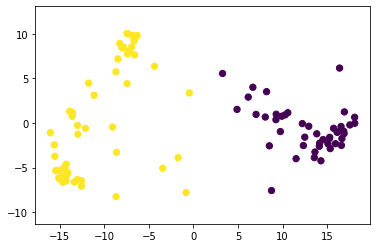

In [0]:
kmeans = KMeans(2)
labels = kmeans.fit(projected).predict(projected)
plt.scatter(projected[:, 0], projected[:, 1], c=labels, s=40, cmap='viridis');
ax = plt.gca()
ax.axis('equal')
plt.show();

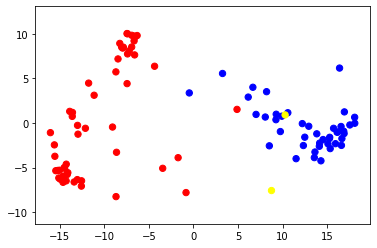

In [0]:
kmeans = KMeans(2)
labels = kmeans.fit(projected).predict(projected)
plt.scatter(projected[:, 0], projected[:, 1], c=affiliations, s=40, cmap='viridis');
ax = plt.gca()
ax.axis('equal')
plt.show();

In [0]:
Red = np.where(affiliations=='Red')
Blue  = np.where(affiliations=='Blue')
Red = np.squeeze(Red)
Blue = np.squeeze(Blue)
print(Red)
print(Blue)
red_sen_id = np.where(projected[Red,0] >= 0)
blue_sen_id = np.where(projected[Blue,0] < 0)
print(Red[red_sen_id])
print(Blue[blue_sen_id])
print(af[0][Red[red_sen_id]])
print(af[0][Blue[blue_sen_id]])

[ 0  7  9 11 13 14 15 18 23 26 27 28 32 33 36 37 38 39 41 42 45 46 47 48
 49 52 53 56 57 58 59 60 66 67 68 69 70 71 72 73 74 78 79 80 82 83 85 89
 90 91 92 93 97 98 99]
[ 1  2  3  4  5  6  8 10 12 16 17 19 20 21 22 24 25 29 30 31 35 40 43 44
 50 51 54 55 61 63 64 65 75 76 77 81 84 86 87 88 94 95 96]
[58]
[21]
58    Chafee Red
Name: 0, dtype: object
21    Nelson Blue
Name: 0, dtype: object


<ul>
<li> <b> From the above PCA plot we can see clearly spot the two misclassified senators- One red point in the blue cluster and one blue point among the red cluster. <br> 
<li> <b> K means gives us circular clusters 
<li> The reason that K Means has misclassified these points can be that these two are much closer to the cluster centers of the opposite group than their own.
We can visualize and observe that the two green crosses denote the two cluster centers and we can also see that the misclassified points are much closer to the opposite party's cluster center.
</b>

<li> <b> Also, we can get a qualitative understanding of why these points are closer to the opposite cluster by looking at the multiple number of times these two senators have abstained their vote showing non-typical party behavior. 
<li> <b> This is shown in the results for the misclassified senators : Lincoln D. Chafee and E. Benjamin'Ben'Nelson 
    </ul>